In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import new_lib as nl

In [2]:
zil = nl.connect('zillow', 'zillow.csv', 'SELECT * FROM properties_2017 WHERE propertylandusetypeid = 261')
# calling the sql set and creating a csv of my query

In [3]:
zil.describe()
# quick description of the data

,Unnamed: 0,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock
count,2.152863e+06,2.152863e+06,2.152863e+06,513889.000000,2393.000000,1538.000000,2.152852e+06,2.152852e+06,1.0,1.420228e+06,...,2.143526e+06,590839.000000,2849.0,2.145929e+06,2.152370e+06,2.152862e+06,2.152361e+06,2.148421e+06,41248.000000,2.140543e+06
mean,1.076431e+06,1.490834e+06,1.309657e+07,2.405724,7.187631,651.190507,2.230688e+00,3.287196e+00,4.0,6.146940e+00,...,1.960950e+03,1.386009,1.0,1.787203e+05,4.618962e+05,2.015999e+03,2.837120e+05,5.634866e+03,13.883897,6.048664e+13
std,6.214782e+05,8.608785e+05,5.171557e+06,3.785956,2.739586,552.078809,9.992796e-01,9.547544e-01,NaN,1.697333e+00,...,2.216220e+01,0.537773,0.0,2.717850e+05,6.996760e+05,5.561433e-02,5.026645e+05,8.178910e+03,2.431594,3.599350e+11
min,0.000000e+00,1.000000e+00,1.071172e+07,1.000000,2.000000,20.000000,0.000000e+00,0.000000e+00,4.0,1.000000e+00,...,1.801000e+03,1.000000,1.0,1.000000e+00,1.000000e+00,2.000000e+03,1.000000e+00,1.850000e+00,0.000000,-1.000000e+00
25%,5.382155e+05,7.451170e+05,1.165907e+07,1.000000,7.000000,261.750000,2.000000e+00,3.000000e+00,4.0,4.000000e+00,...,1.949000e+03,1.000000,1.0,7.414100e+04,1.881702e+05,2.016000e+03,7.967300e+04,2.534980e+03,14.000000,6.037402e+13
50%,1.076431e+06,1.490613e+06,1.259852e+07,1.000000,7.000000,519.500000,2.000000e+00,3.000000e+00,4.0,6.000000e+00,...,1.958000e+03,1.000000,1.0,1.224410e+05,3.276710e+05,2.016000e+03,1.838970e+05,4.108950e+03,14.000000,6.037571e+13
75%,1.614646e+06,2.235860e+06,1.405609e+07,1.000000,7.000000,889.500000,3.000000e+00,4.000000e+00,4.0,8.000000e+00,...,1.976000e+03,2.000000,1.0,2.038650e+05,5.345270e+05,2.016000e+03,3.452750e+05,6.414320e+03,15.000000,6.059042e+13
max,2.152862e+06,2.982282e+06,1.696019e+08,13.000000,21.000000,8516.000000,3.200000e+01,2.500000e+01,4.0,1.200000e+01,...,2.016000e+03,41.000000,1.0,6.640493e+07,9.842891e+07,2.016000e+03,8.892195e+07,1.337756e+06,99.000000,4.830301e+14


In [5]:
zil = zil.rename(columns = {"Unnamed: 0": "index"})
zil = zil[['index', 'id', 'bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet', 'taxvaluedollarcnt', 'yearbuilt', 
           'taxamount', 'fips']]
zil
# getting dataframe into the right subset

,index,id,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0,1,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,1,15,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,2,16,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,3,17,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4,20,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
...,...,...,...,...,...,...,...,...,...
2152858,2152858,2982268,4.0,3.0,2262.0,960756.0,2015.0,13494.52,6059.0
2152859,2152859,2982270,4.0,4.5,3127.0,536061.0,2014.0,6244.16,6059.0
2152860,2152860,2982272,0.0,0.0,NaN,208057.0,NaN,5783.88,6059.0
2152861,2152861,2982275,3.0,2.5,1974.0,424353.0,2015.0,5302.70,6059.0


In [8]:
zil.isnull().sum()
# Finding null values

index                              0
id                                 0
bedroomcnt                        11
bathroomcnt                       11
calculatedfinishedsquarefeet    8484
taxvaluedollarcnt                493
yearbuilt                       9337
taxamount                       4442
fips                               0
dtype: int64

After determining that there are enough observations to outright drop nulls I am going to drop all null values

In [17]:
zil = zil.dropna()
# dropping all null values

In [20]:
zil.info()
# checking and confirming all datatypes remaining are numeric in nature

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140235 entries, 4 to 2152862
Data columns (total 9 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   index                         int64  
 1   id                            int64  
 2   bedroomcnt                    float64
 3   bathroomcnt                   float64
 4   calculatedfinishedsquarefeet  float64
 5   taxvaluedollarcnt             float64
 6   yearbuilt                     float64
 7   taxamount                     float64
 8   fips                          float64
dtypes: float64(7), int64(2)
memory usage: 163.3 MB


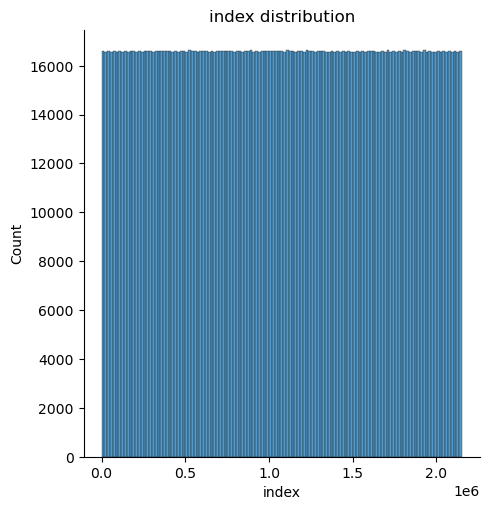

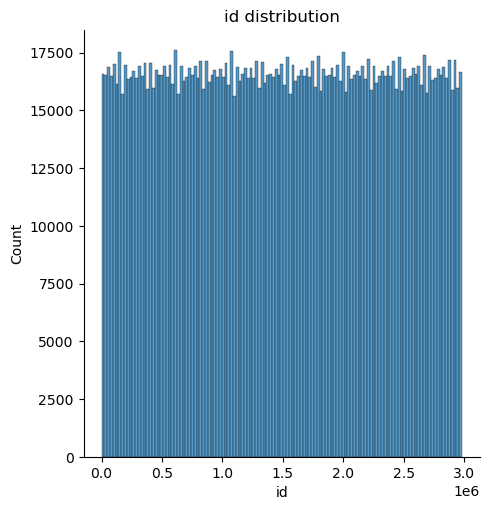

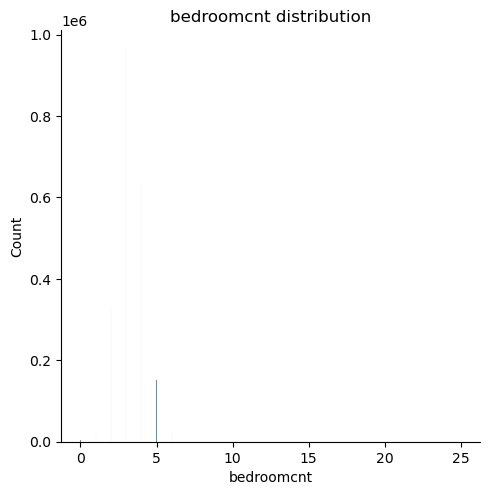

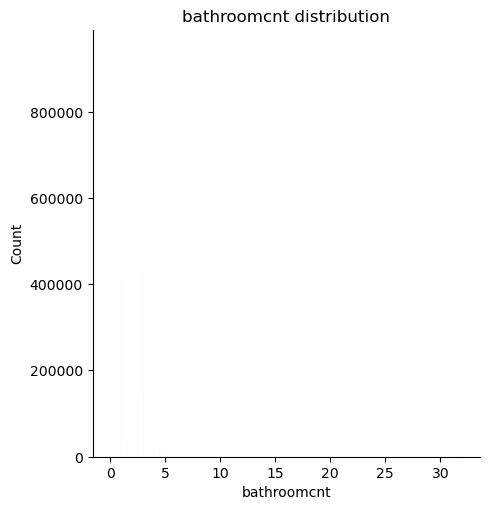

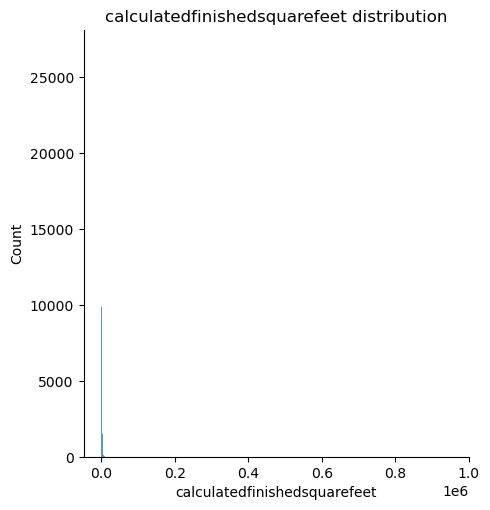

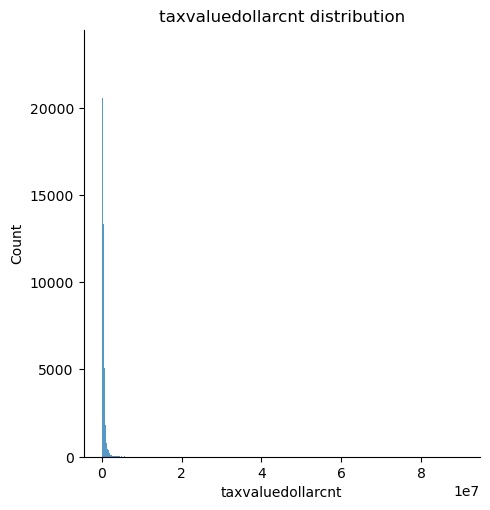

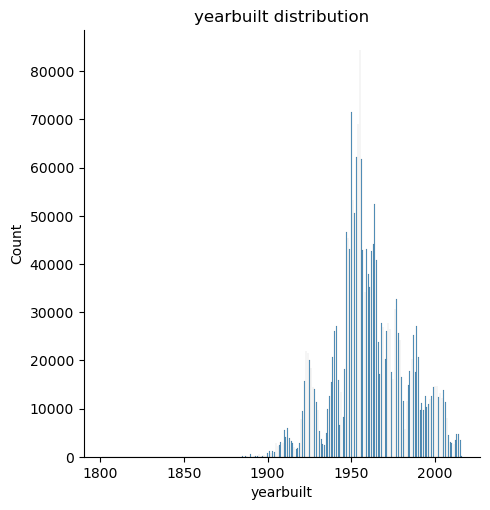

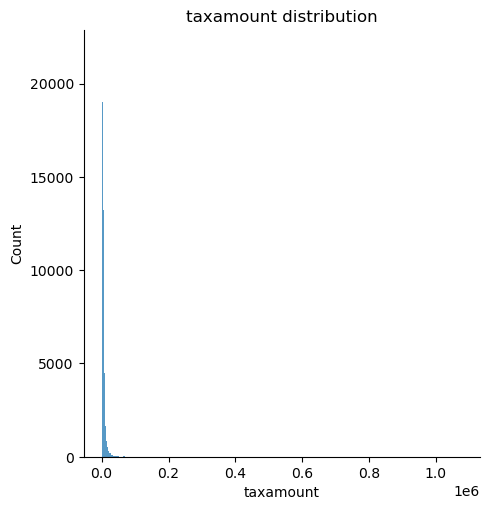

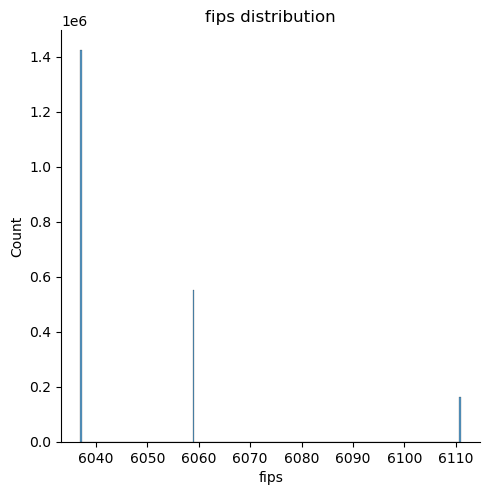

In [22]:
for col in zil.columns:
    
    sns.displot(zil[col])
    plt.title(f'{col} distribution')
    plt.show()

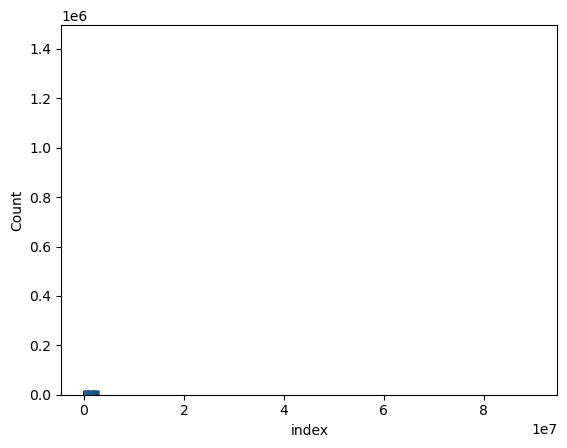

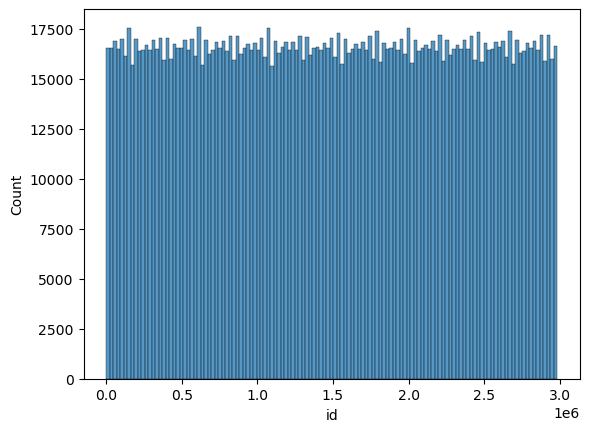

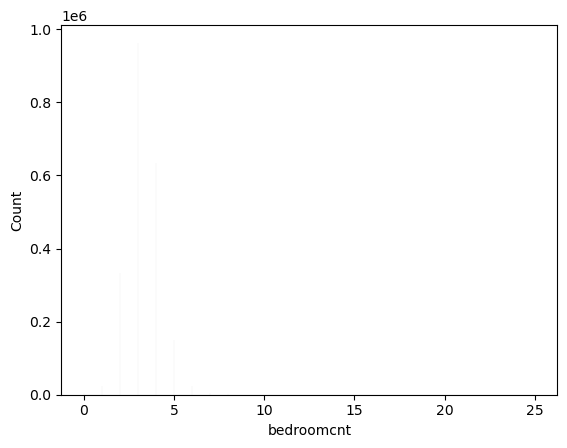

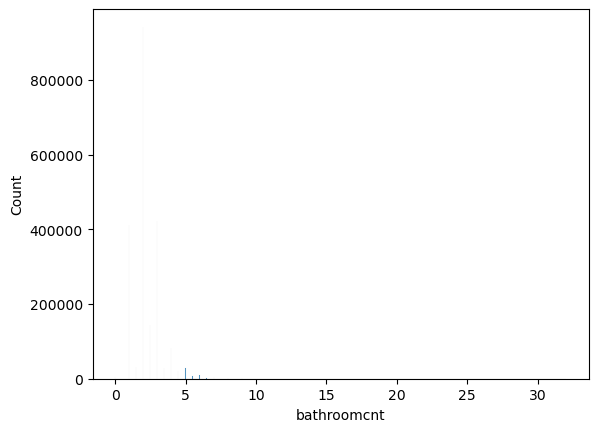

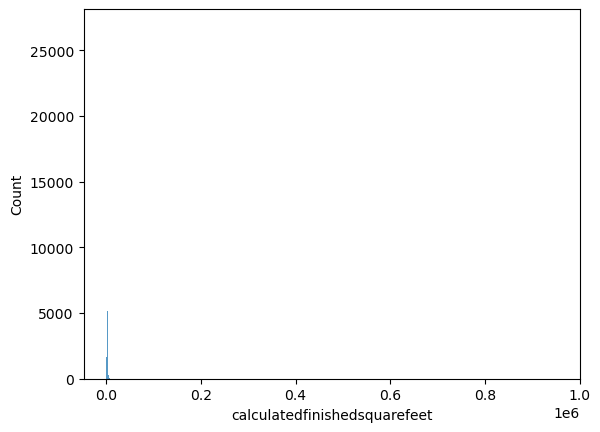

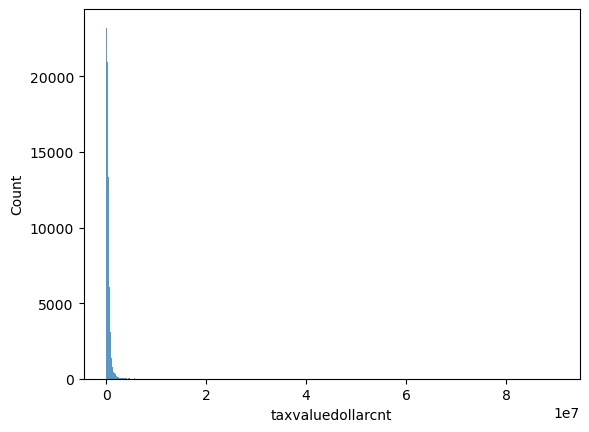

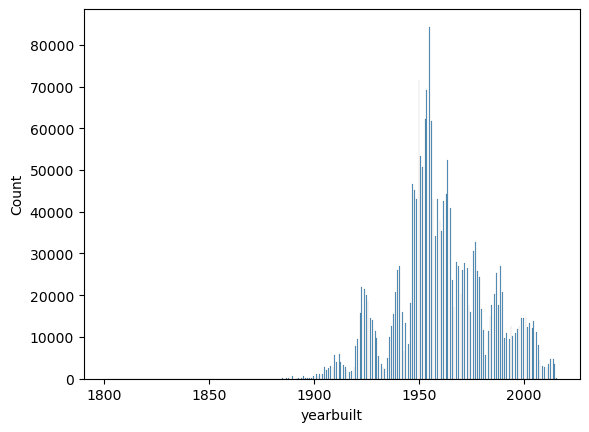

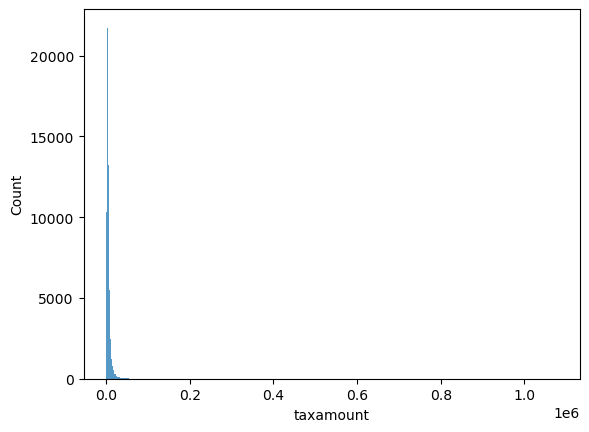

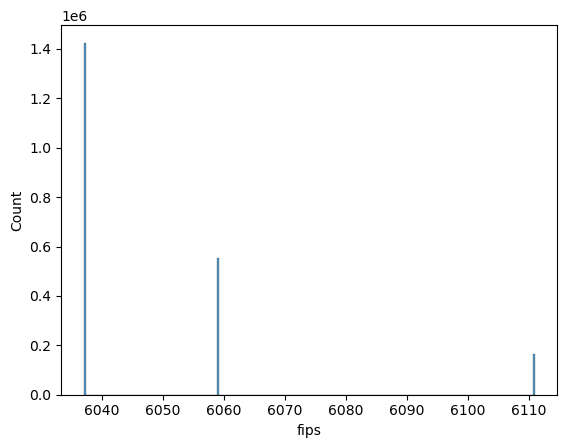

In [26]:
for col in zil.columns:
    sns.histplot(zil[col])
    plt.show()